In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

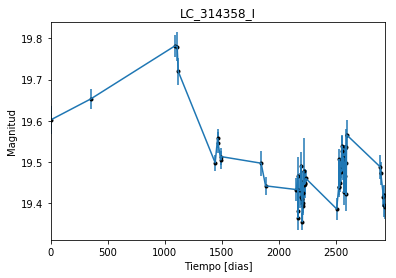

In [2]:
data = np.genfromtxt('LC_314358_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_314358_I')
plt.savefig("LC_314358_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

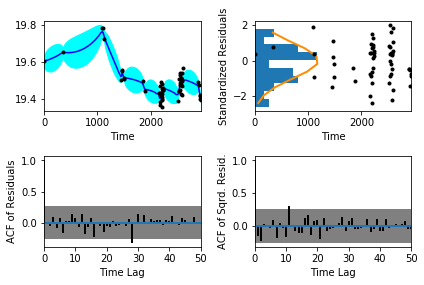

In [5]:
sample.assess_fit()

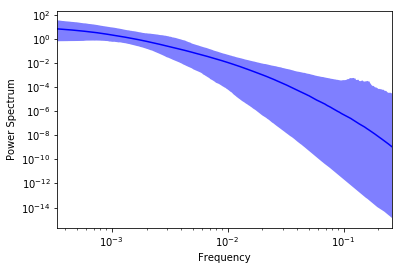

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

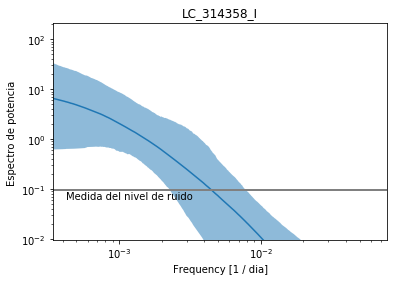

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_314358_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_314358_I')

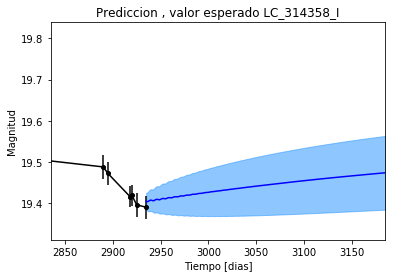

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_314358_I')

Text(0.5,1,'Prediccion, Caminos simulados_LC_314358_I')

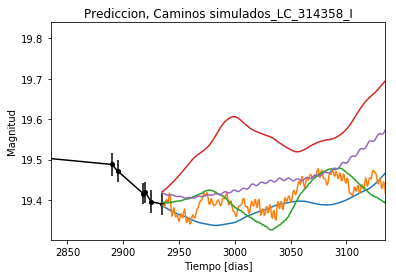

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_314358_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


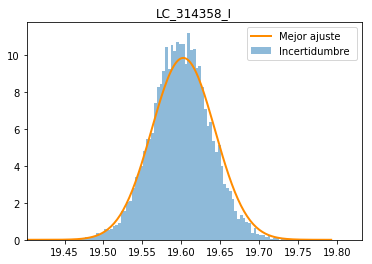

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_314358_I')
plt.savefig("Mejor_ajuste_LC_314358_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_314358_I')

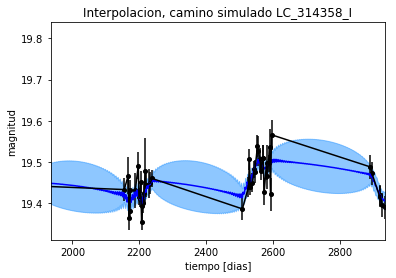

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_314358_I')

Text(0.5,1,'Interpolacion, camino simulado LC_314358_I')

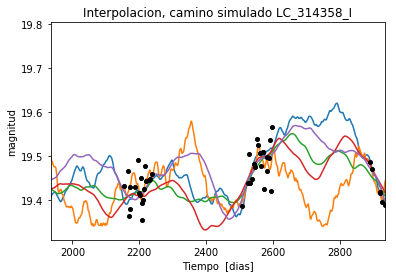

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_314358_I')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1141.40215784
Median: 0.0119471454048
Standard deviation: 0.106834387178
68% credibility interval: [ 0.00131477  0.11998846]
95% credibility interval: [ 0.00043386  0.42143371]
99% credibility interval: [  3.54283804e-04   5.01238583e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 829.931007797
Median: 0.0032458219342
Standard deviation: 0.0503802589433
68% credibility interval: [ 0.00057946  0.02727668]
95% credibility interval: [ 0.00036545  0.17471785]
99% credibility interval: [  3.44866252e-04   3.51276805e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 662.903612539
Median: 0.0239929263946
Standard deviation: 

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1001.45062016
Median: 117.632896015
Standard deviation: 1.78895666816
68% credibility interval: [ 115.70044379  119.15894516]
95% credibility interval: [ 113.36324524  120.28622391]
99% credibility interval: [ 111.56692684  120.94079186]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 539.247964519
Median: 0.489403669299
Standard deviation: 1.25092901701
68% credibility interval: [ 0.07803839  2.42015732]
95% credibility interval: [ 0.01885153  4.14404992]
99% credibility interval: [ 0.01198057  5.79692846]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 625.170653213
Median: 0.47069691593
Standard deviation: 2.65046801181
68% credibility interval: [ 0.02779571  3.2890126 ]
95% credibility interval: [  1.72690075e-03

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20006.0371686
Median: 7.02525950042e-29
Standard deviation: 1.09434604961e+32
68% credibility interval: [  6.17502885e-86   1.52280458e-07]
95% credibility interval: [  5.86545584e-196   3.07035046e+001]
99% credibility interval: [  7.91854018e-222   4.61998067e+017]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2049.35660268
Median: 19.5382123809
Standard deviation: 0.0661411295477
68% credibility interval: [ 19.48320109  19.59792291]
95% credibility interval: [ 19.40639314  19.67126091]
99% credibility interval: [ 19.33419094  19.73801136]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 714.586585104
Median: 0.0260593048102
Standard deviation: 0.134052756035
68% credibility interval: [ 0.          0.23167547]
95% credibility interval: [ 0.          0.46742382]
99% credibility interval: [ 0.          0.51339271]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 714.586585104
Median: 0.0260593048102
Standard deviation: 0.134052756035
68% credibility interval: [ 0.          0.23167547]
95% credibility interval: [ 0.          0.46742382]
99% credibility interval: [ 0.          0.51339271]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 924.165895003
Median: 0.0
Standard deviation: 0.00068982569992
68% cre

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1001.45062016
Median: 117.632896015
Standard deviation: 1.78895666816
68% credibility interval: [ 115.70044379  119.15894516]
95% credibility interval: [ 113.36324524  120.28622391]
99% credibility interval: [ 111.56692684  120.94079186]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2135.08530873
Median: 0.0159269107525
Standard deviation: 0.0174048129298
68% credibility interval: [ 0.00995448  0.02922774]
95% credibility interval: [ 0.00644838  0.06584752]
99% credibility interval: [ 0.00482552  0.11606348]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1124.87841564
Median: 1.17312881676
Standard deviation: 0.19880542785
68% credibility interval: [ 0.99895566  1.3838569 ]
95% credibility interval: [ 0.84243109  1.63640728]
99% credibility interval: [ 0.75634109  1.81080739]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 807.563471095
Median: 0.000213030882021
Standard deviation: 0.018606902366
68% credibility interval: [  5.08345435e-06   3.68297580e-03]
95% credibility interval: [  4.39950153e-08   3.99208728e-02]
99% credibility interval: [  1.25034508e-21   1.27866101e-01]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1141.40215784
Median: (-0.0750661284699-0.558803390675j)
Standard deviation: 1.07704367242
68% credibility interval: [-0.75390975-3.09033817j -0.00826091-1.01364327j]
95% credibility interval: [-2.64794609+0.j         -0.00272599-2.54110565j]
99% credibility interval: [ -3.14937490e+00+0.j          -2.22603079e-03-0.02494876j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 829.931007797
Median: (-0.0203941006867+0.115596012016j)
Standard deviation: 0.899797589029
68% credibility interval: [-0.17138446+0.00510791j -0.00364084+0.j        ]
95% credibility interval: [-1.09778464+3.00217073j -0.00229620+0.j        ]
99% credibility interval: [ -2.20713726e+00+2.88538012j  -2.16685857e-03+1.32999891j]
Posterior summary for